<a href="https://colab.research.google.com/github/JithendraGopal/html-protfol/blob/main/python_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install face_recognition



SyntaxError: ignored

In [3]:
!pip3 install face_recognition
!pip3 install cmake
!pip3 install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=c916e2f8841e1a3ea914c0b417292e62180e3df45cf05b0fabe553fdd5244a8e
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Enter the image file path of the missing person : /content/photos/PHOTO-2023-12-02-22-25-46.jpg
Enter the second image file path : /content/photos/PHOTO-2023-12-02-22-25-47.jpg
Enter the person's name: girl
Enter the video file path: /content/photos/VIDEO-2023-12-02-22-25-08.mp4
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
The faces do not match.
Person not found, its no

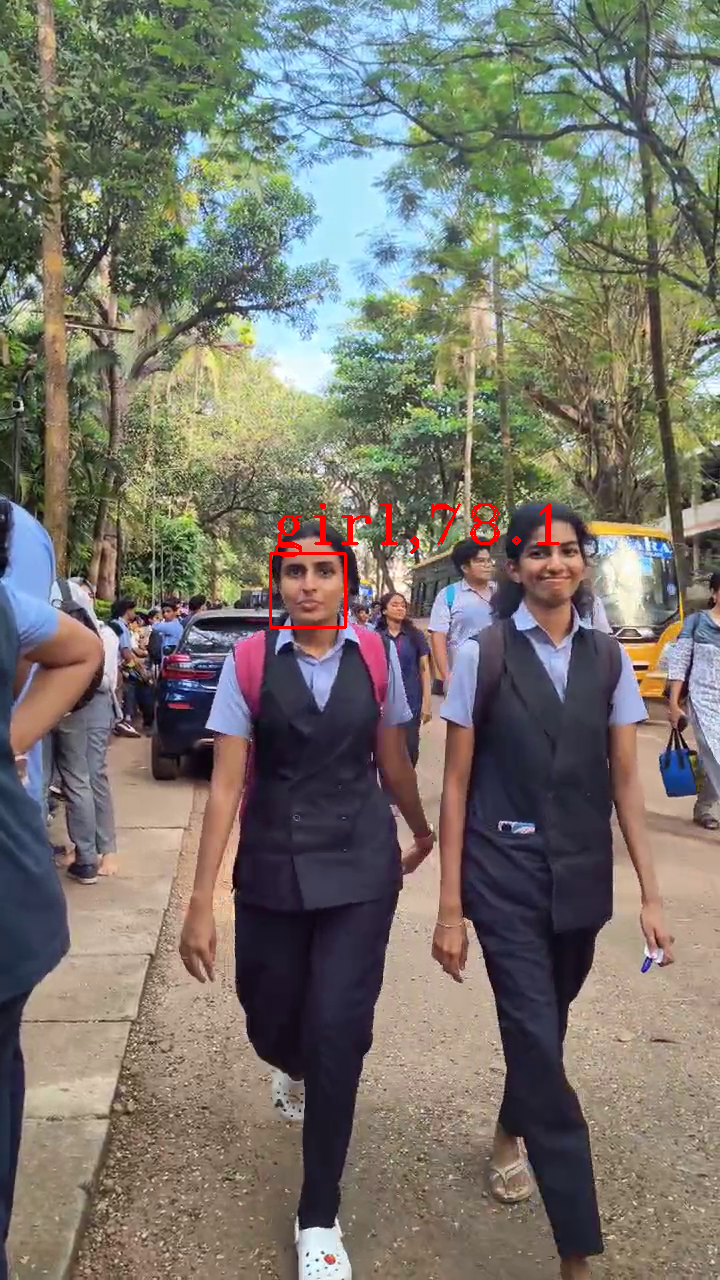

press X for continuing.... x
67.5%
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
79.8%
Found the person, It's girl
To exit the image press 'X' 


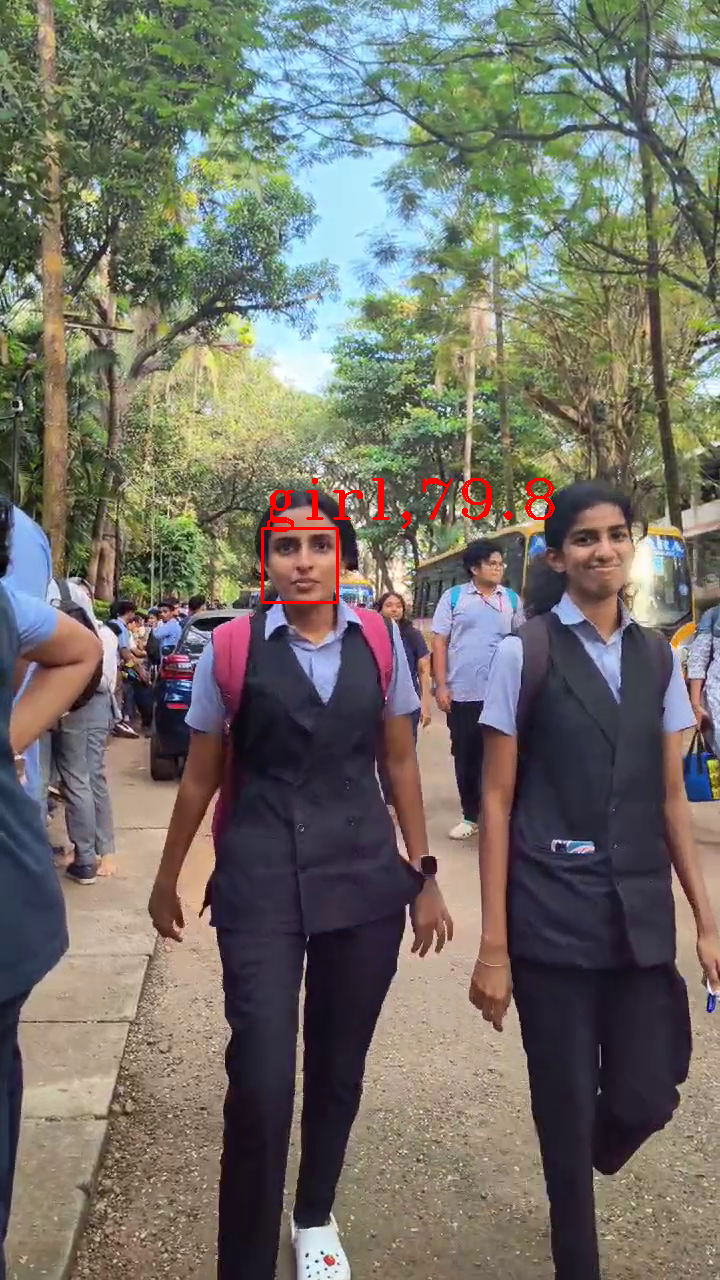

press X for continuing.... x
64.5%
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
84.4%
Found the person, It's girl
To exit the image press 'X' 


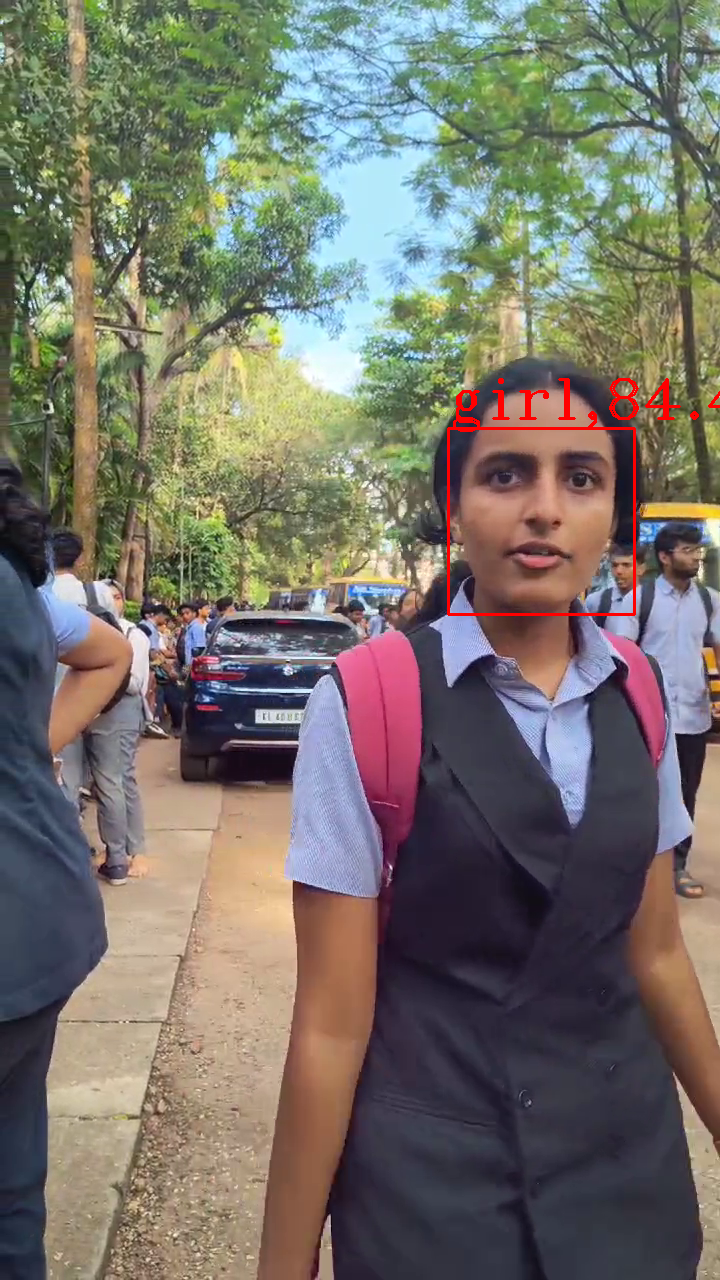

press X for continuing.... x
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
25.3%
36.6%
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
34.8%
67.2%
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
53.0%
43.2%
38.2%
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
51.4%
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
56.0%
37.1%
31.7%
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
55.0%
35.8%
52.6%
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
40.2%
40.1%
52.5%
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
41.2%
38.7%
57.5%
The faces do not match.
Person not found, its not girl
To exit the image press 'X' 
52.6%
36.0%

In [4]:
import cv2
import face_recognition
import random
from google.colab.patches import cv2_imshow
import time

def process(file_path1, person_name, video_file, file_path2):
    # Read the images and the video.
    image = cv2.imread(file_path1)
    image2 = cv2.imread(file_path2)
    video = cv2.VideoCapture(video_file)

    # Get the frames per second (fps) and total frames in the video
    fps = int(video.get(cv2.CAP_PROP_FPS))
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the duration in seconds.
    duration_seconds = total_frames / fps
    duration = int(round(duration_seconds/0.4))


    # Randomly select images according to the video length.
    selected_indices = random.sample(range(total_frames), duration)


    # Image processing for the image.
    # This line loads an image file from the specified file_path1.
    known_image = face_recognition.load_image_file(file_path1)
    # This line extracts facial encodings from the loaded image.
    known_face = face_recognition.face_encodings(known_image)[0]
    #same for the second image.
    known_image2 = face_recognition.load_image_file(file_path2)
    known_face2 = face_recognition.face_encodings(known_image2)[0]

    for i in range(total_frames):
       # Read a frame from the video.
        ret, frame = video.read()
        # "ret" is a boolean indicating whether the frame was read successfully or not.
        # "frame" is the actual frame that was captured. It is a NumPy array representing the image.

        if not ret:
            break  # Break the loop if the video is over.


        if i in selected_indices:
            # Find faces in the current frame.
            face_locations = face_recognition.face_locations(frame) #find the locations of faces from the video image.
            face_encodings = face_recognition.face_encodings(frame, face_locations) #the facial features of the detected faces.

            for face_encoding in face_encodings: # This loop iterates over each face encoding in the "face_encodings" list.
            # Compare the face with the input image and store the value in "matches".
                matches = face_recognition.compare_faces([known_face], face_encoding)
            # Calculate the face match score (percentage of similarity).
                face_match_score1 = face_recognition.face_distance([known_face], face_encoding)[0]

                matches2 = face_recognition.compare_faces([known_face2], face_encoding)


                face_match_score = round(((((1 - face_match_score1)*100)*1.2)+10),1) # To make the values into % .

                print(f"{face_match_score}%") # Print the values in the terminal.

                # if there is a match between the images, the % score is >= 70 and match the second image too then the if statment works.
                if matches[0] and face_match_score >= 75 and matches2[0]:
                #it will print and show the person name in the terminal.
                    print(f"Found the person, It's {person_name}")
                    print("To exit the image press 'X' ")
                # If a match is found, mark the face with a rectangle.
                    top, right, bottom, left = face_locations[0]
                    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
                    # Convert the face_match_score to a string to display the values in the image.
                    face_match_score_str = str(face_match_score)
                    # Concatenate person_name, face_match_score.
                    text_to_display = f'{person_name},{face_match_score_str}'
                    #text will display in the processed image.
                    cv2.putText(frame,text_to_display,(left, top - 10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 3, (0,0,255),2)

                     #it will display the matched image from the video.
                    # time.sleep(5) #it will help to lock the image for 0ms.
                    # if time.sleep(1) & 0xFF == ord('x'): #while pressing the "X" it will break from the loop.
                    #     break

                    cv2_imshow(frame)
                    time.sleep(4)
                    giv = input("press X for continuing.... ")
                    while True:


                      # cv2_imshow(frame)

                      if giv == "x" :
                        break


                # if the face is not the same it will print " The face do not match ".
            else :
                print(f"The faces do not match.")
                print(f"Person not found, its not {person_name}")
                # Print the values in the terminal.
                print("To exit the image press 'X' ")


            # Display the randomly selected frame
            from google.colab.patches import cv2_imshow
            # cv2_imshow(frame)
            # time.sleep(0)


            # Display the current video image and the input image.

            # cv2_imshow(image)
            # cv2_imshow(image2)

        # Break the loop if the 'x' is pressed in the keyboard.
        if cv2.waitKey(1) & 0xFF == ord('x'):
            break
    # Release the video capture object and close the OpenCV window.
    video.release()
    cv2.destroyAllWindows()


def main():
    # Get file paths of the image, video and person name input from the user
    file_path1 = input("Enter the image file path of the missing person : ")
    file_path2 = input("Enter the second image file path : ")
    person_name = input("Enter the person's name: ")
    video_file = input("Enter the video file path: ")

    # Pass the inputs to the function to display the concatenated image, name and video
    process (file_path1, person_name, video_file, file_path2)


#it will only run the main code 1st.
if __name__ == "__main__":
    main()